In [1]:
import os
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
os.environ['THESIS_PATH']

'/data4/nanni/tesi-magistrale'

In [30]:
k = 10

set_res = pd.read_csv(f"{os.environ['THESIS_PATH']}/data/josie-tests/set_2m/results/extracted_results_k_{k}.csv")
bag_res = pd.read_csv(f"{os.environ['THESIS_PATH']}/data/josie-tests/bag_2m/results/extracted_results_k_{k}.csv")

In [29]:
set_res = set_res.iloc[range(0, 450, 10)]
bag_res = bag_res.iloc[range(0, 450, 10)]

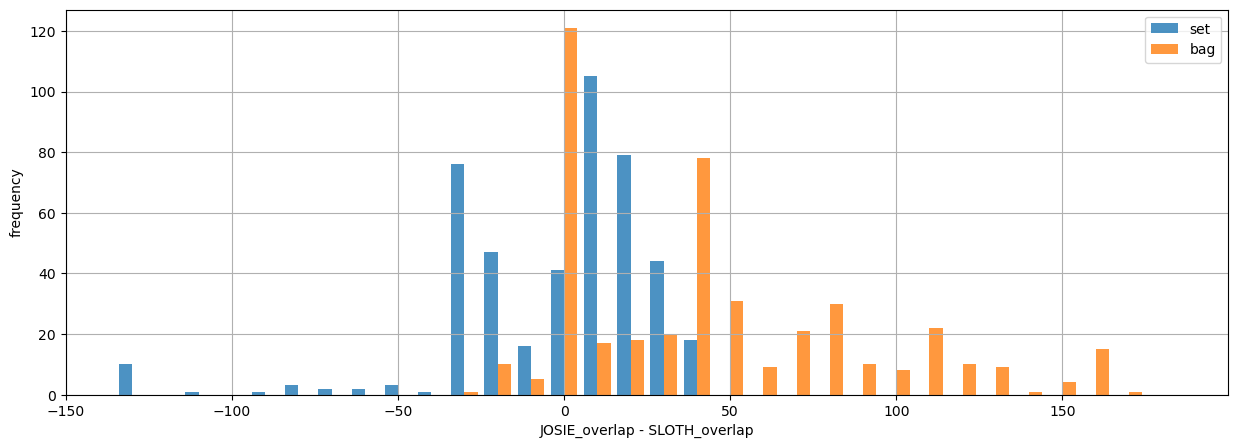

In [41]:
import numpy as np

fig, ax = plt.subplots(1, 1, sharey='row', figsize=(15, 5))
xmin, xmax = -150, 200

ax.hist([set_res['difference_josie_sloth_overlap'], 
         bag_res['difference_josie_sloth_overlap']], 
         bins=np.arange(xmin, xmax, 10), alpha=0.8, 
         label=['set', 'bag'],
         align='left')
ax.set_xlim(xmin, xmax)
ax.set_xticks(np.arange(xmin, xmax, 50))
ax.grid()
ax.set_xlabel('JOSIE_overlap - SLOTH_overlap')
ax.set_ylabel('frequency')
plt.legend()
plt.show()

In [45]:
bag_res['difference_josie_sloth_overlap'].shape

(450,)

In [33]:
import json

with open('/data4/nanni/tesi-magistrale/data/josie-tests/set_2m/queries.json') as fr:
    queries = json.load(fr)

In [39]:
sloth_res = queries[2]['sloth_res']
res = bag_res

common = pd.DataFrame(columns=res.columns)

for r in sloth_res:
    r_id, s_id = r[:2]

    if res[(res['wiki_query_id'] == r_id) & (res['wiki_set_id'] == s_id)].shape[0] > 0:
        common = pd.concat(
            [common,
            res[(res['wiki_query_id'] == r_id) & (res['wiki_set_id'] == s_id)]]
        ) 

    if res[(res['wiki_query_id'] == s_id) & (res['wiki_set_id'] == r_id)].shape[0] > 0:
        common = pd.concat(
            [common,
            res[(res['wiki_query_id'] == s_id) & (res['wiki_set_id'] == r_id)]]
        )

common.sort_index()
                

,josie_query_id,wiki_query_id,josie_set_id,wiki_set_id,josie_overlap,sloth_overlap,difference_josie_sloth_overlap
340,36510,31090095-1,9406,1958639-5,54,48,6
352,9406,1958639-5,36510,31090095-1,54,48,6


In [7]:
df = pd.read_csv('/data4/nanni/tesi-magistrale/data/josie-tests/bag_2m/results/result_k_10.csv')
df['duration'].describe()

count       45.000000
mean      3938.711111
std       3808.616879
min         10.000000
25%         24.000000
50%       1985.000000
75%       7307.000000
max      11425.000000
Name: duration, dtype: float64

<Axes: >

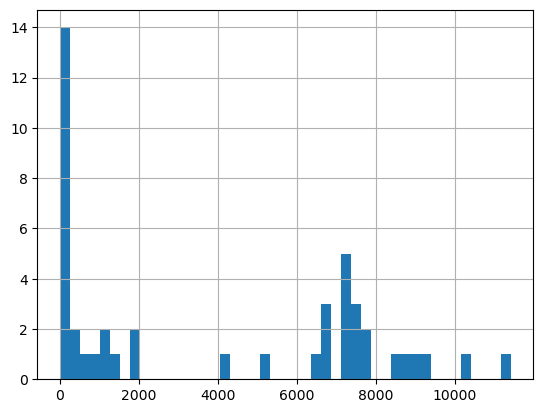

In [8]:
df['duration'].hist(bins=45)

In [20]:
df = pd.read_csv('/data4/nanni/tesi-magistrale/data/josie-tests/set_2m/results/result_k_10.csv')
df['duration'].describe()

count      45.000000
mean     2836.022222
std      2321.601294
min         7.000000
25%        16.000000
50%      3748.000000
75%      4562.000000
max      6509.000000
Name: duration, dtype: float64

<Axes: >

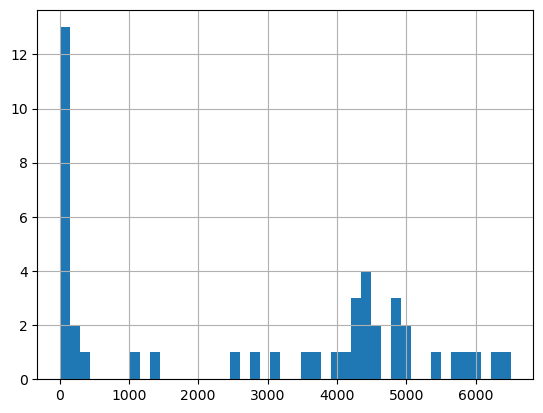

In [21]:
df['duration'].hist(bins=45)

In [7]:
set_py = pd.read_csv('/data4/nanni/tesi-magistrale/data/josie-tests/set1m_py/results/result_k_20.csv')
set_jar = pd.read_csv('/data4/nanni/tesi-magistrale/data/josie-tests/set1m_jar/results/result_k_20.csv')

set_py['duration'].describe()

count     300.000000
mean     1762.293333
std      1235.048757
min         1.000000
25%       275.000000
50%      2070.000000
75%      2857.250000
max      4519.000000
Name: duration, dtype: float64

In [8]:
set_jar['duration'].describe()

count     300.000000
mean     1989.663333
std      1264.243236
min         0.000000
25%       759.250000
50%      2348.000000
75%      3016.250000
max      4168.000000
Name: duration, dtype: float64